In [136]:
!python -m pip install -U gensim

Requirement already up-to-date: gensim in d:\anaconda\lib\site-packages (4.1.2)


In [137]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.pipeline import Pipeline

from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.decomposition import PCA

In [138]:
df = pd.read_csv("./out.csv")
df.drop('Unnamed: 0', axis=1, inplace=True)
df.drop('label', axis=1, inplace=True)
text_list = df['segment'][400:].values.tolist()

In [139]:
tokenized_list = []
for segment in text_list:
    tokenized_segment = segment.split()
    tokenized_list.append(tokenized_segment)

In [146]:
text_train = [TaggedDocument(doc, [i]) for i, doc in enumerate(tokenized_list)]

In [142]:
text_train

[TaggedDocument(words=['obstin', 'bigot', 'offici', 'set', 'defianc', 'liber', 'initi', 'govern', 'trust', 'backstair', 'influenc', 'second', 'easi', 'method', 'bring', 'justic', 'guilti', 'offici', 'present', 'franc', 'conflict', 'simpl', 'citizen', 'like', 'men', 'arm', 'cap-a-pi', 'fight', 'defenceless', 'A', 'system', 'intellig', 'nativ', 'liber', 'bring', 'even', 'colour', 'reason', 'grave', 'object', 'danger', 'model', 'foreign', 'imit', 'the', 'defect', 'bureaucraci', 'inde', 'well', 'known', 'It', 'form', 'govern', 'tri', 'often', 'enough', 'world', 'easi', 'show', 'human', 'natur', 'long', 'run', 'defect', 'bureaucraci', 'must', 'long', 'run', 'It', 'inevit', 'defect', 'bureaucrat', 'care', 'routin', 'result', 'burk', 'put', 'think', 'substanc', 'busi', 'much', 'import', 'form', 'their', 'whole', 'educ', 'habit', 'life', 'make', 'they', 'brought', 'young', 'particular', 'part', 'public', 'servic', 'attach', 'occupi', 'year', 'learn', 'form', 'afterward', 'year', 'appli', 'form

In [148]:
#set up hyper parameters for the model
#we try to analysis how the key hyper parameters including vector size, window and minimum count affect the Doc2Vec model
#then we select the best model(transformer)
sizes = [1000, 2000, 3000]
windows = [5, 10, 20]
min_counts = [1, 10, 20]

In [177]:
d2v_models = []
idx = 0
for size in sizes:
    for window in windows:
        for min_count in min_counts:
            d2v_model = Doc2Vec(text_train, vector_size=size, window=window, min_count=min_count)
            d2v_models.append(d2v_model)
            idx += 1
            print('model {}: size = {}, window = {}, min_count = {}'.format(idx, size, window, min_count))

model 1: size = 1000, window = 5, min_count = 1
model 2: size = 1000, window = 5, min_count = 10
model 3: size = 1000, window = 5, min_count = 20
model 4: size = 1000, window = 10, min_count = 1
model 5: size = 1000, window = 10, min_count = 10
model 6: size = 1000, window = 10, min_count = 20
model 7: size = 1000, window = 20, min_count = 1
model 8: size = 1000, window = 20, min_count = 10
model 9: size = 1000, window = 20, min_count = 20
model 10: size = 2000, window = 5, min_count = 1
model 11: size = 2000, window = 5, min_count = 10
model 12: size = 2000, window = 5, min_count = 20
model 13: size = 2000, window = 10, min_count = 1
model 14: size = 2000, window = 10, min_count = 10
model 15: size = 2000, window = 10, min_count = 20
model 16: size = 2000, window = 20, min_count = 1
model 17: size = 2000, window = 20, min_count = 10
model 18: size = 2000, window = 20, min_count = 20
model 19: size = 3000, window = 5, min_count = 1
model 20: size = 3000, window = 5, min_count = 10
mode

In [154]:
X=[]
for model in d2v_models:
    x_train = []
    for d in tokenized_list:
        x_train.append(model.infer_vector(d))
    X.append(x_train)

In [160]:
def elbow_method(data, K):
    iters = range(2, K + 1)
    sse = []
    for k in iters:
        sse.append(KMeans(n_clusters = k, 
                        init='k-means++', 
                        max_iter=300, 
                        n_init=10, 
                        random_state=0)
                        .fit(data)
                        .inertia_)

    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')

<ipython-input-160-c622020ac5f6>:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f, ax = plt.subplots(1, 1)


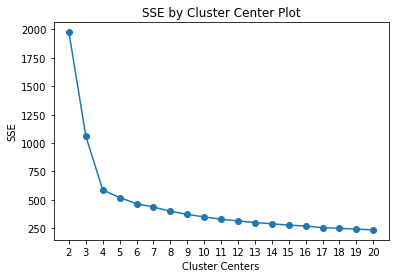

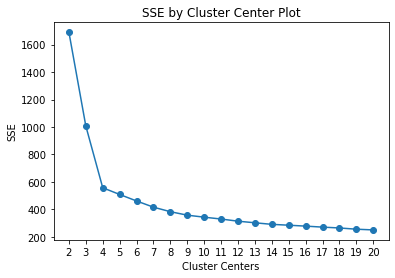

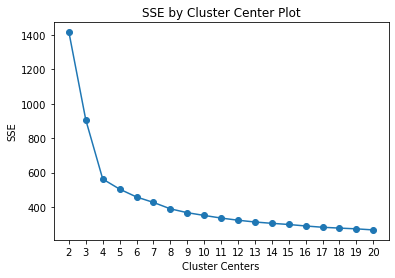

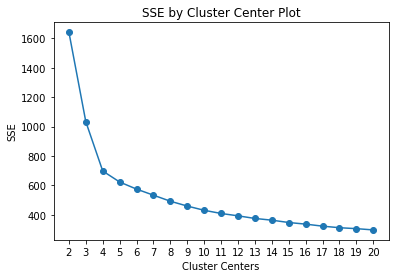

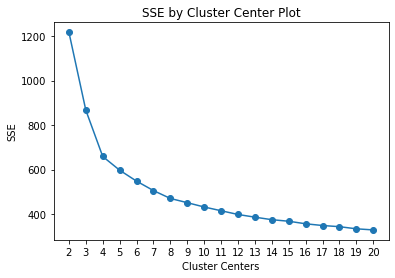

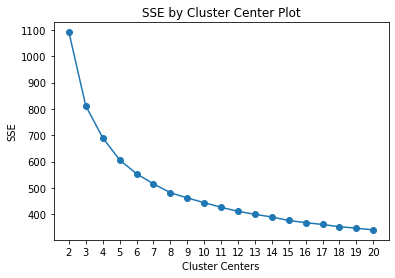

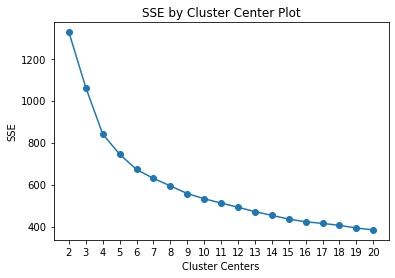

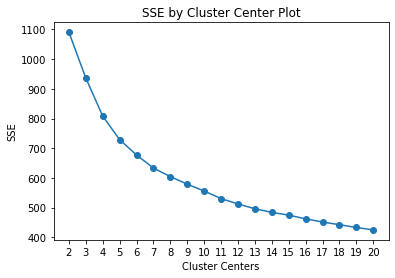

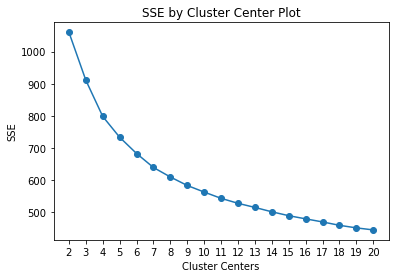

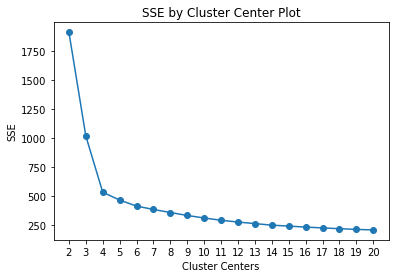

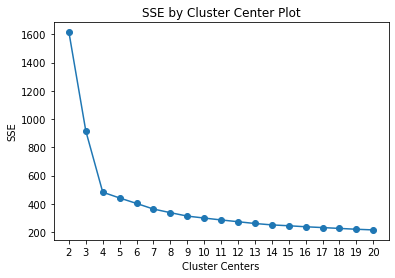

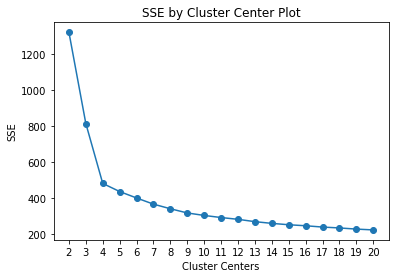

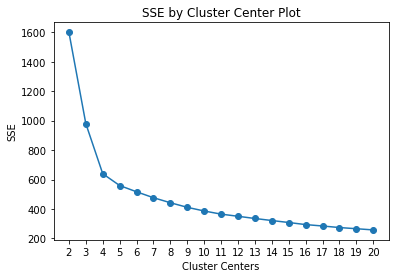

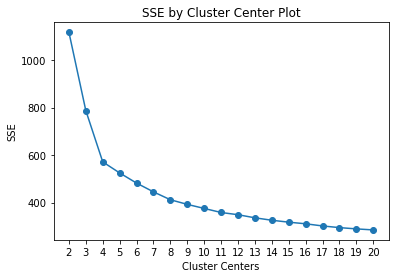

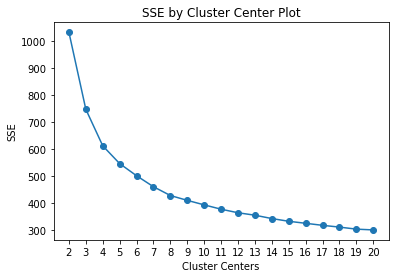

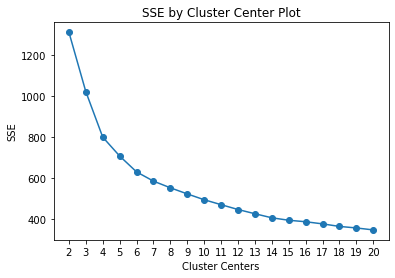

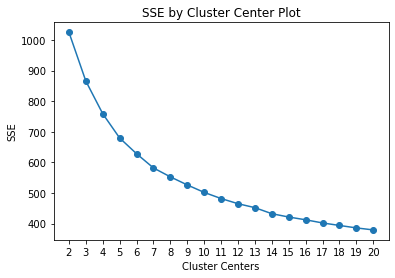

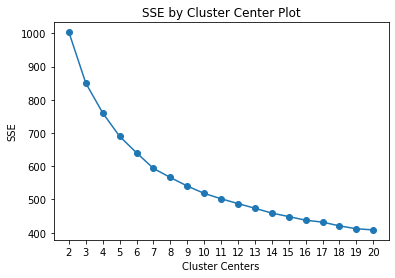

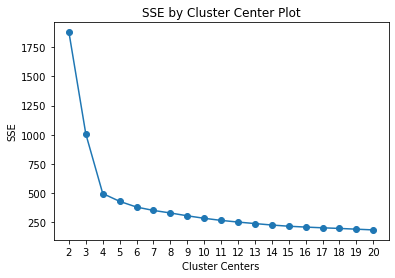

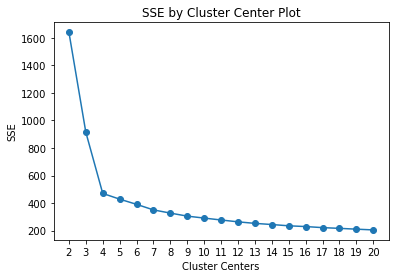

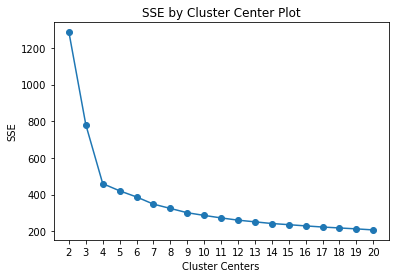

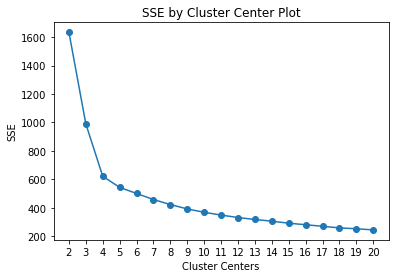

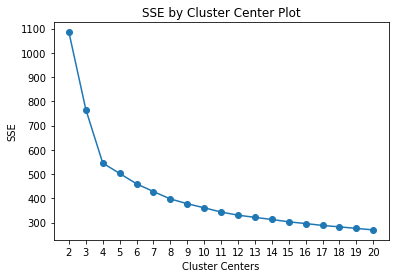

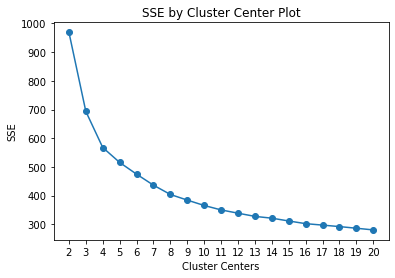

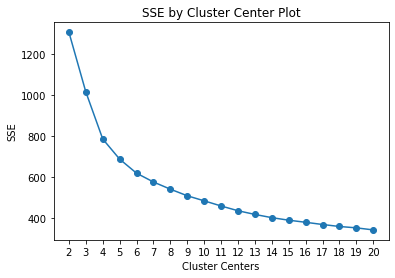

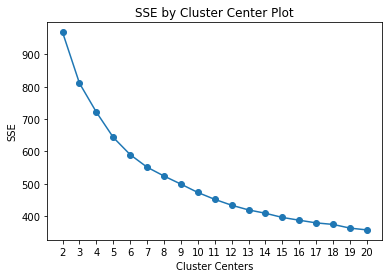

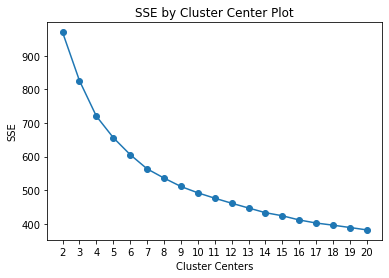

In [161]:
for x_train in X:
    elbow_method(x_train, 20)

In [162]:
from sklearn.metrics import cohen_kappa_score, adjusted_rand_score, silhouette_score
def silhouette_method(data, K):
    iters = range(2, K + 1)
    score = []
    for k in iters:
        model = KMeans(n_clusters = k, init='k-means++', max_iter=300, n_init=10, random_state=0)
        cluster_labels = model.fit_predict(data)
        silhouette_avg = silhouette_score(data, cluster_labels)
        print("For n_clusters =" + str(k) + "The average silhouette_score is :" + str(silhouette_avg))

In [163]:
for x_train in X:
    silhouette_method(x_train, 20)

For n_clusters =2The average silhouette_score is :0.4421296
For n_clusters =3The average silhouette_score is :0.50667495
For n_clusters =4The average silhouette_score is :0.55576193
For n_clusters =5The average silhouette_score is :0.4557127
For n_clusters =6The average silhouette_score is :0.39328924
For n_clusters =7The average silhouette_score is :0.33270502
For n_clusters =8The average silhouette_score is :0.31231436
For n_clusters =9The average silhouette_score is :0.30455947
For n_clusters =10The average silhouette_score is :0.30986544
For n_clusters =11The average silhouette_score is :0.31150252
For n_clusters =12The average silhouette_score is :0.26960087
For n_clusters =13The average silhouette_score is :0.2677414
For n_clusters =14The average silhouette_score is :0.23115863
For n_clusters =15The average silhouette_score is :0.22748189
For n_clusters =16The average silhouette_score is :0.25297466
For n_clusters =17The average silhouette_score is :0.22895126
For n_clusters =18T

For n_clusters =3The average silhouette_score is :0.20802481
For n_clusters =4The average silhouette_score is :0.21545191
For n_clusters =5The average silhouette_score is :0.22599941
For n_clusters =6The average silhouette_score is :0.22544985
For n_clusters =7The average silhouette_score is :0.22238049
For n_clusters =8The average silhouette_score is :0.21830331
For n_clusters =9The average silhouette_score is :0.19228311
For n_clusters =10The average silhouette_score is :0.19812052
For n_clusters =11The average silhouette_score is :0.17989093
For n_clusters =12The average silhouette_score is :0.17630704
For n_clusters =13The average silhouette_score is :0.175231
For n_clusters =14The average silhouette_score is :0.17233804
For n_clusters =15The average silhouette_score is :0.17066239
For n_clusters =16The average silhouette_score is :0.17285785
For n_clusters =17The average silhouette_score is :0.16951379
For n_clusters =18The average silhouette_score is :0.1507679
For n_clusters =19

For n_clusters =4The average silhouette_score is :0.34025234
For n_clusters =5The average silhouette_score is :0.30069873
For n_clusters =6The average silhouette_score is :0.27921733
For n_clusters =7The average silhouette_score is :0.27136996
For n_clusters =8The average silhouette_score is :0.2683603
For n_clusters =9The average silhouette_score is :0.2658649
For n_clusters =10The average silhouette_score is :0.2268986
For n_clusters =11The average silhouette_score is :0.23078173
For n_clusters =12The average silhouette_score is :0.20422435
For n_clusters =13The average silhouette_score is :0.20861487
For n_clusters =14The average silhouette_score is :0.18559071
For n_clusters =15The average silhouette_score is :0.18673718
For n_clusters =16The average silhouette_score is :0.1756348
For n_clusters =17The average silhouette_score is :0.17590946
For n_clusters =18The average silhouette_score is :0.1740939
For n_clusters =19The average silhouette_score is :0.17410013
For n_clusters =20T

For n_clusters =5The average silhouette_score is :0.39980644
For n_clusters =6The average silhouette_score is :0.335164
For n_clusters =7The average silhouette_score is :0.31691766
For n_clusters =8The average silhouette_score is :0.29313055
For n_clusters =9The average silhouette_score is :0.29225555
For n_clusters =10The average silhouette_score is :0.273284
For n_clusters =11The average silhouette_score is :0.28282854
For n_clusters =12The average silhouette_score is :0.27390027
For n_clusters =13The average silhouette_score is :0.26657403
For n_clusters =14The average silhouette_score is :0.26592177
For n_clusters =15The average silhouette_score is :0.24149413
For n_clusters =16The average silhouette_score is :0.23279229
For n_clusters =17The average silhouette_score is :0.2321639
For n_clusters =18The average silhouette_score is :0.23309179
For n_clusters =19The average silhouette_score is :0.22804596
For n_clusters =20The average silhouette_score is :0.22198413
For n_clusters =2T

In [164]:
from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD

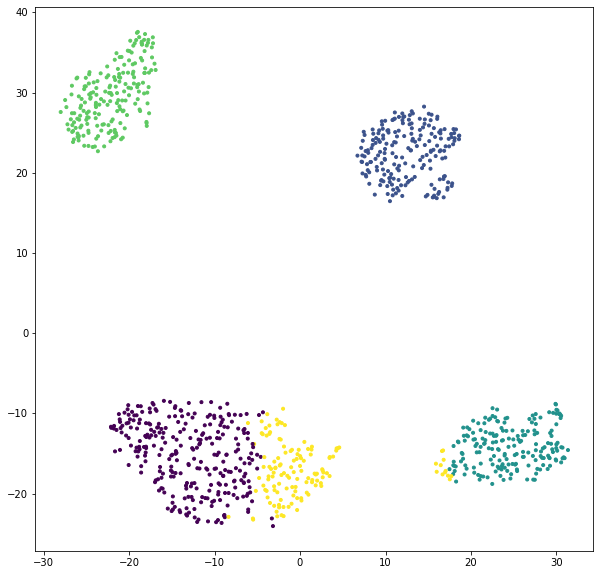

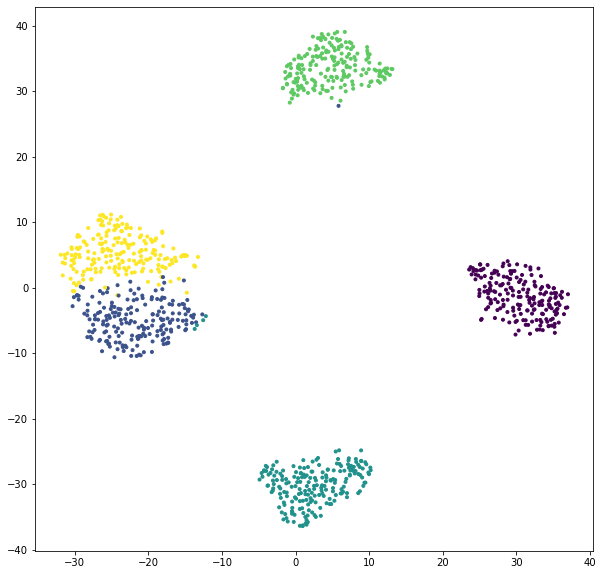

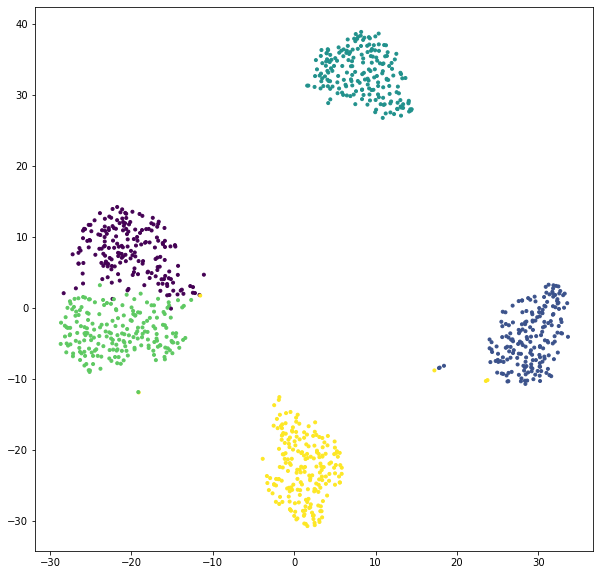

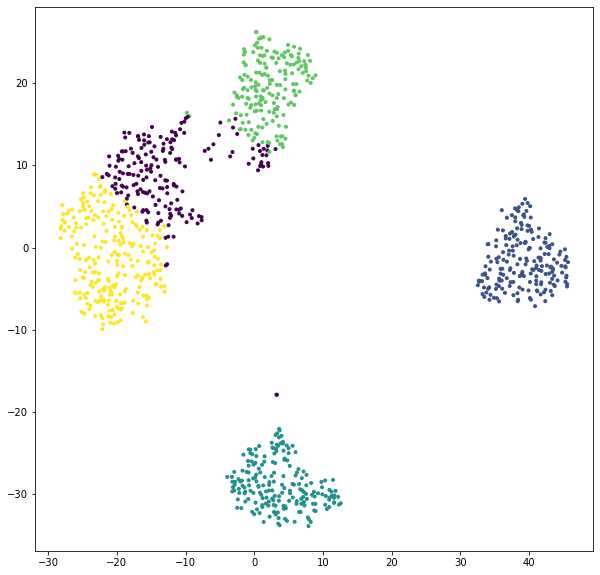

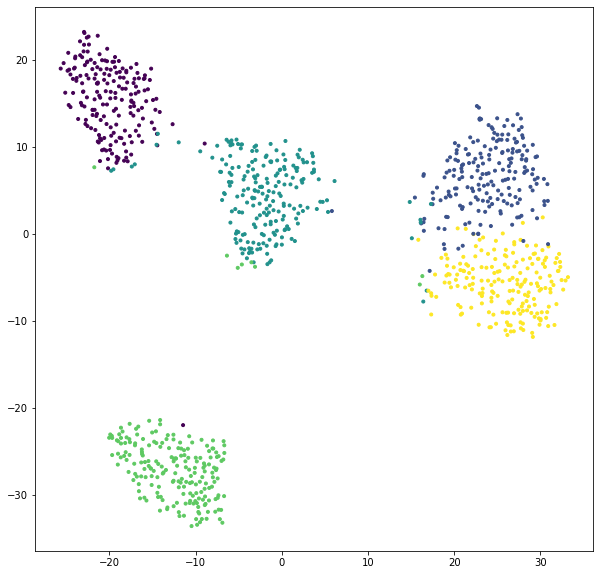

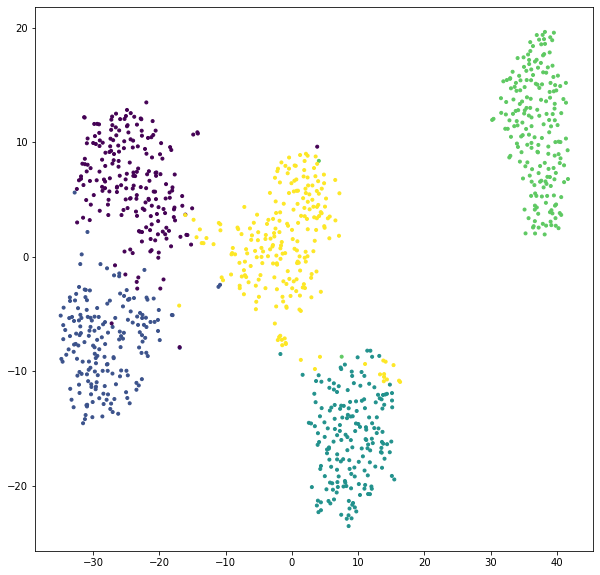

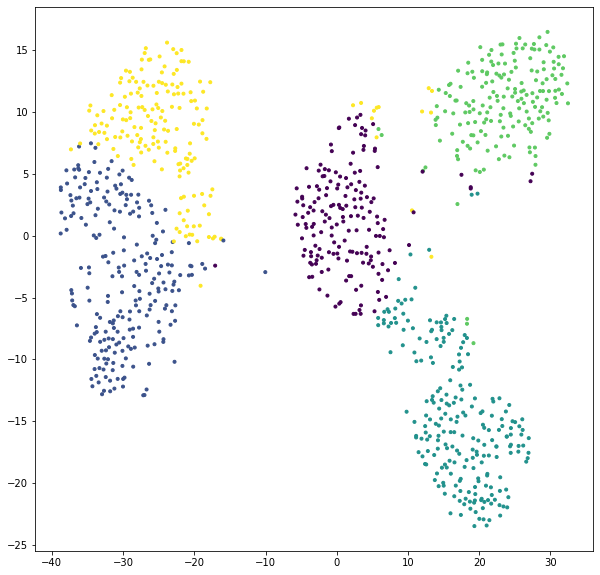

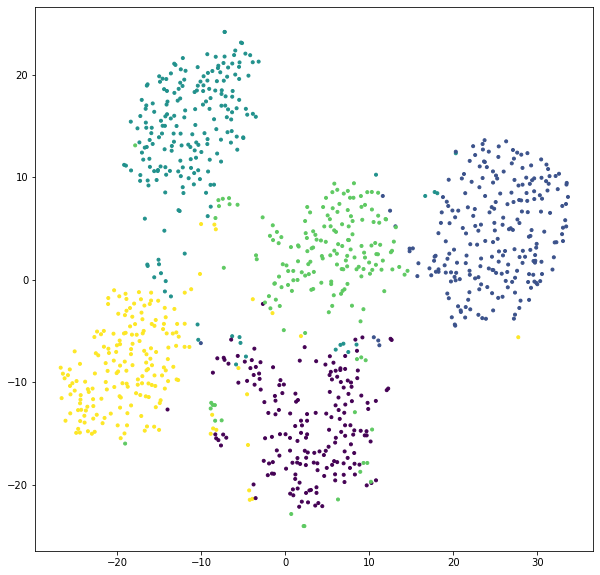

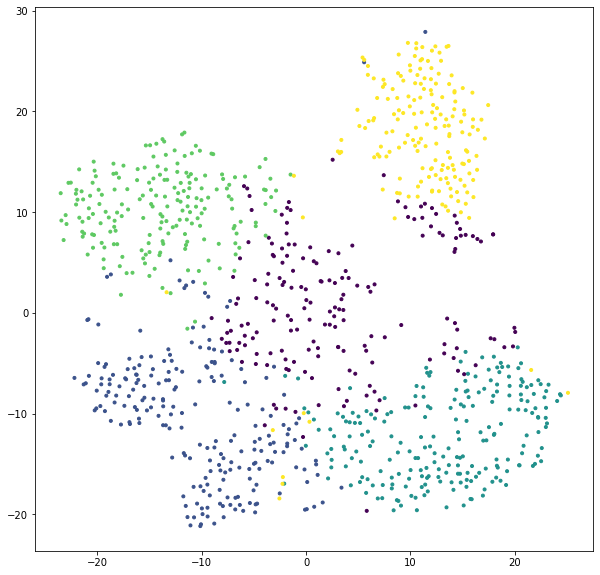

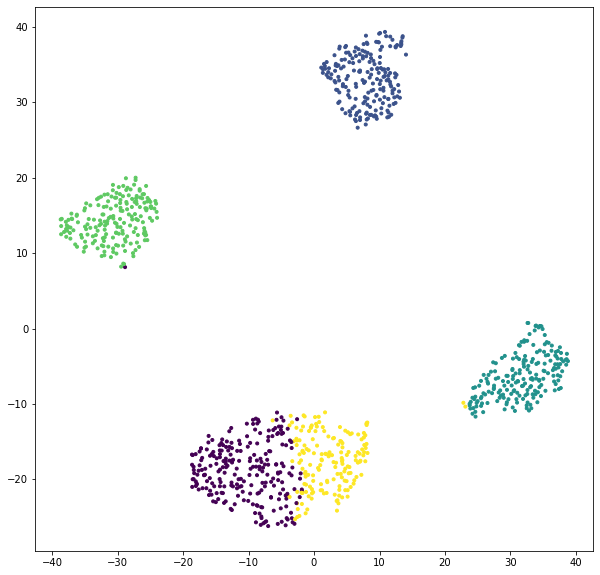

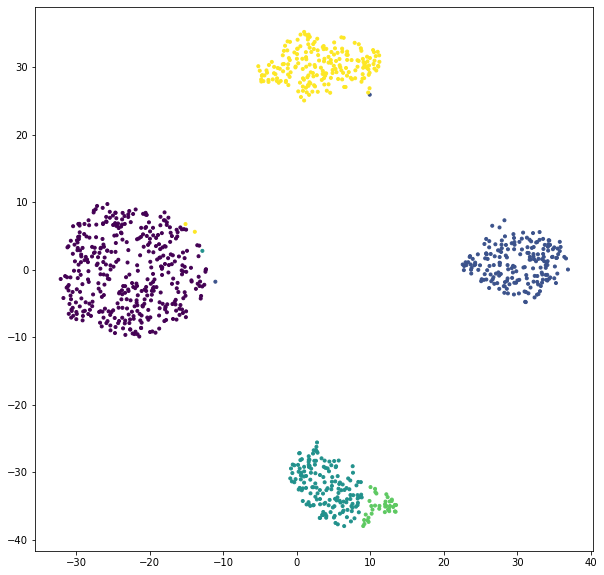

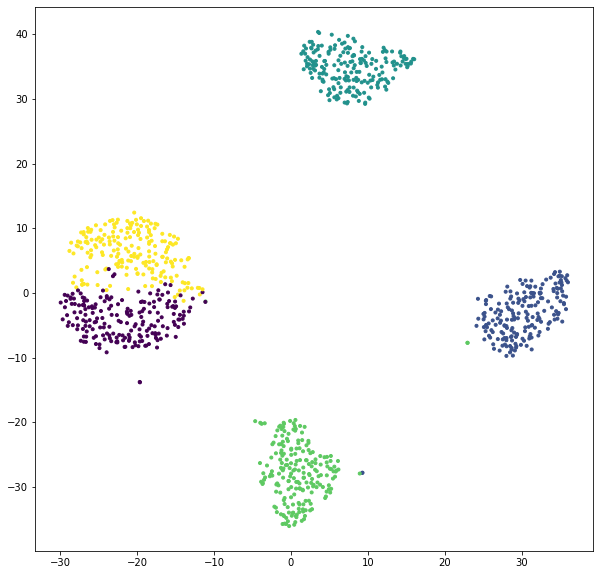

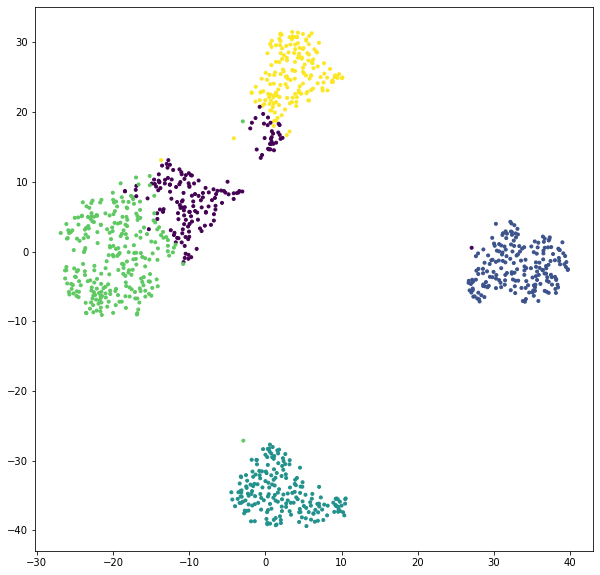

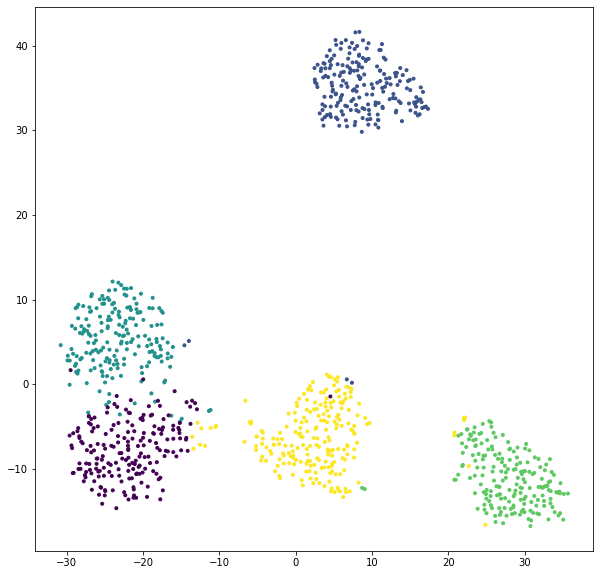

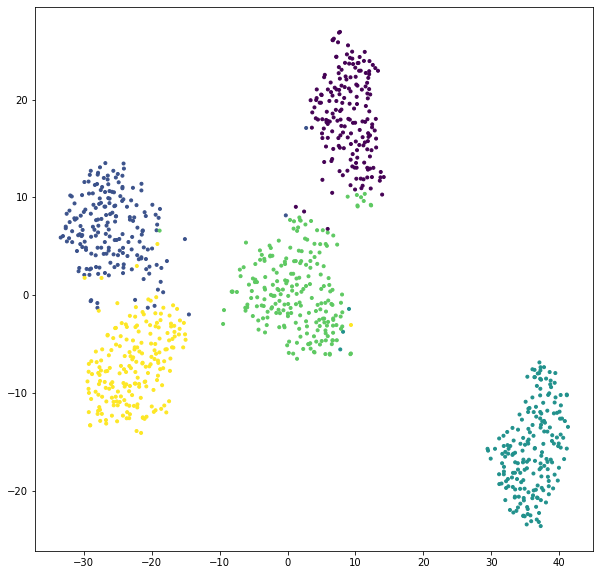

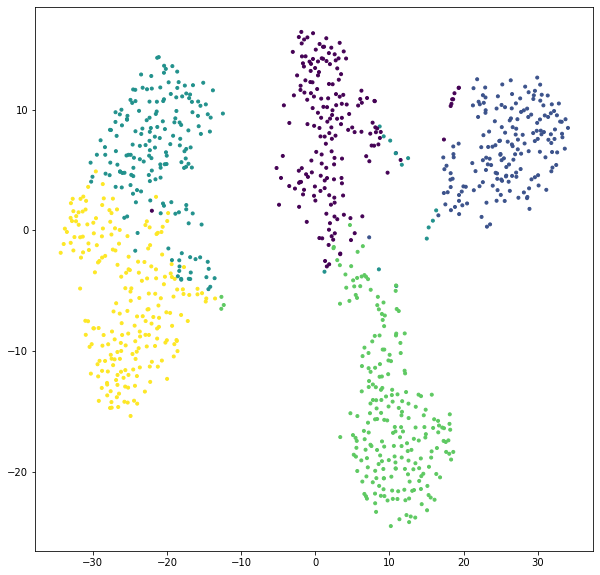

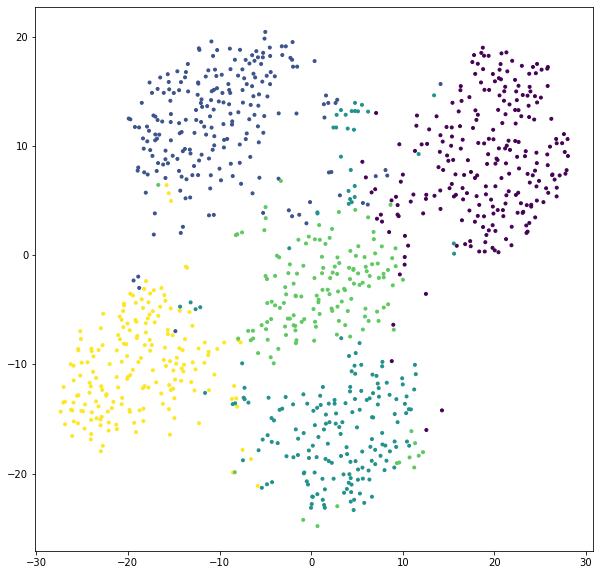

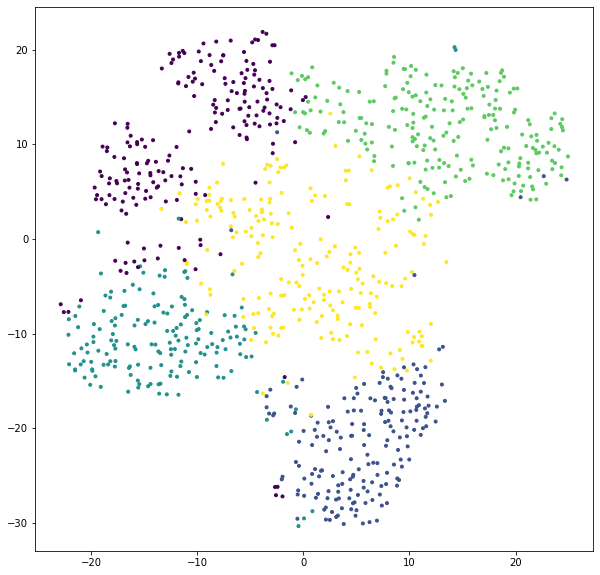

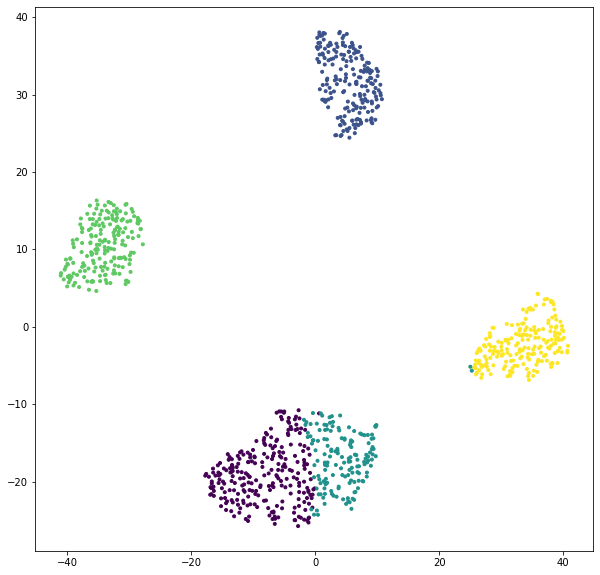

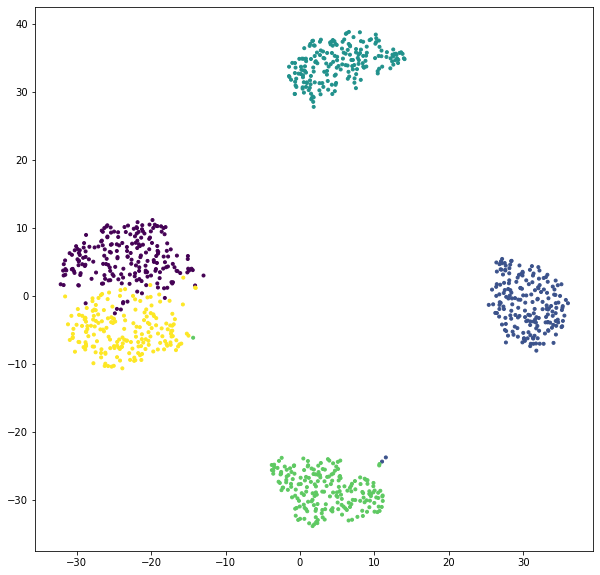

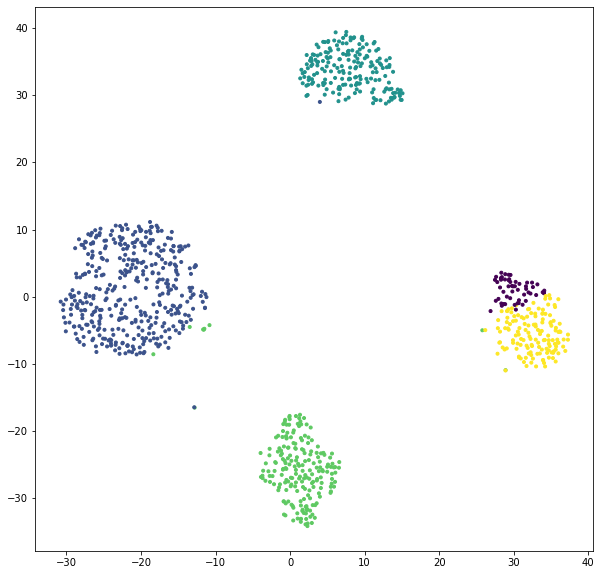

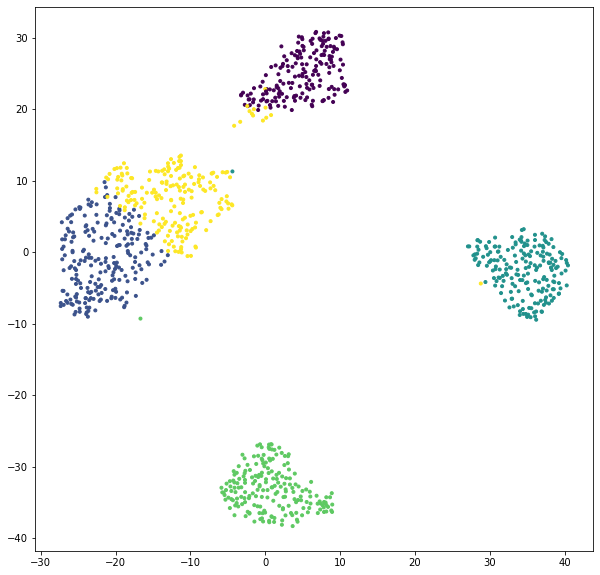

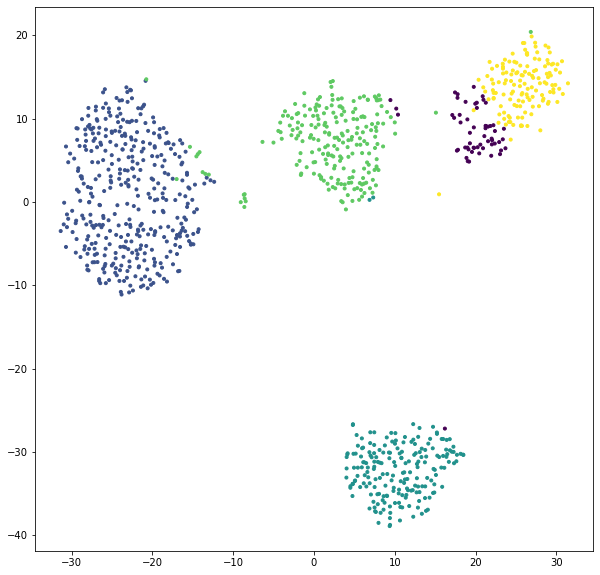

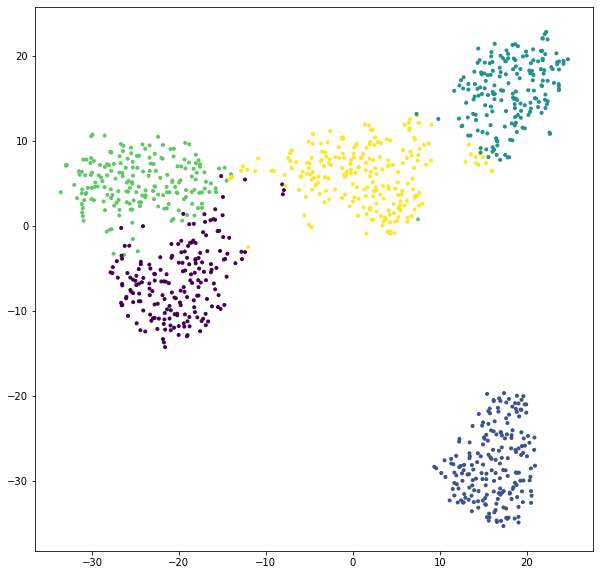

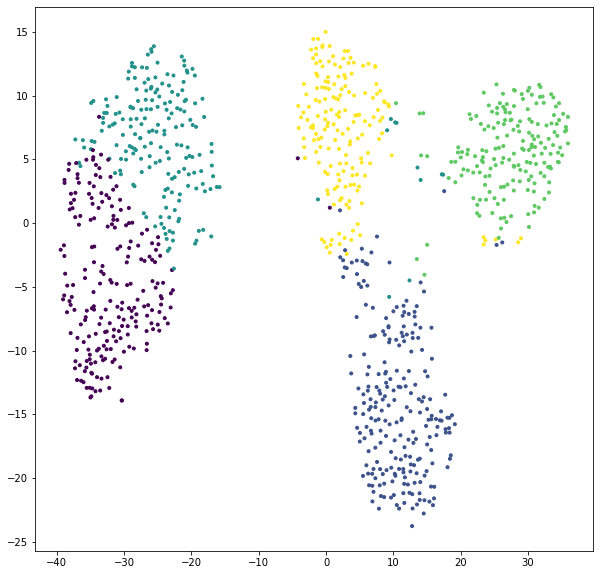

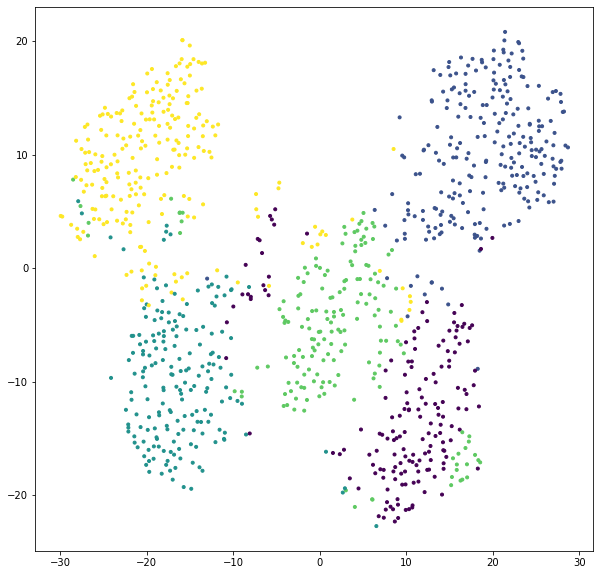

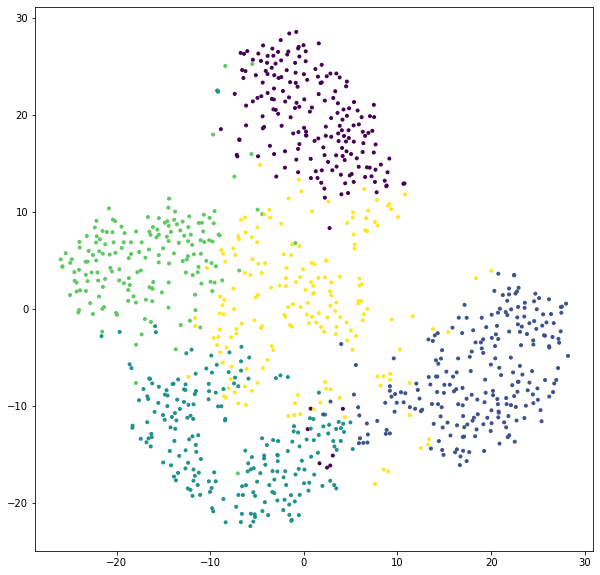

In [166]:
k = 5
d2v_kmeans = KMeans(n_clusters = k, init='k-means++', max_iter=300, n_init=10, random_state=0)
for x_train in X:
    d2v_kmeans.fit(x_train)
    d2v_kmeans_pred = d2v_kmeans.fit_predict(x_train)
    
    d2v_reduced = TruncatedSVD(n_components=k, random_state=0).fit_transform(x_train)

    d2v_embedded = TSNE(n_components=2, 
                        perplexity=50, 
                        init='pca', # globally more stable to initialization
                        n_iter=1000, 
                        random_state=0).fit_transform(d2v_reduced)
    fig = plt.figure(figsize = (10, 10))
    ax = plt.axes()
    plt.scatter(d2v_embedded[:, 0], d2v_embedded[:, 1], marker = ".", c = d2v_kmeans.labels_)
    plt.show()
    

In [175]:
index = 1
for x_train in X:
    d2v_kmeans.fit(x_train)
    d2v_kmeans_pred = d2v_kmeans.fit_predict(x_train)
    
    print('The index of model: {}'.format(index))
    
    for i in range(5):
        group = d2v_kmeans_pred[i*200: i*200+200]
        counts = []
        for j in range(5):
            counts.append(np.count_nonzero(group == j))
        print(counts)
    
    index += 1
    

The index of model: 1
[186, 0, 0, 0, 14]
[96, 0, 0, 0, 104]
[0, 199, 0, 0, 1]
[3, 0, 0, 197, 0]
[0, 0, 189, 0, 11]
The index of model: 2
[0, 21, 0, 0, 179]
[0, 176, 5, 0, 19]
[196, 1, 2, 0, 1]
[0, 0, 0, 197, 3]
[0, 0, 200, 0, 0]
The index of model: 3
[183, 0, 0, 17, 0]
[6, 0, 1, 188, 5]
[1, 194, 0, 1, 4]
[2, 0, 197, 1, 0]
[0, 0, 0, 0, 200]
The index of model: 4
[41, 0, 1, 0, 158]
[115, 0, 0, 1, 84]
[3, 196, 0, 1, 0]
[3, 0, 196, 0, 1]
[23, 0, 0, 177, 0]
The index of model: 5
[0, 16, 0, 0, 184]
[0, 180, 10, 2, 8]
[188, 4, 7, 0, 1]
[0, 0, 0, 199, 1]
[0, 0, 196, 4, 0]
The index of model: 6
[20, 179, 0, 0, 1]
[181, 3, 0, 1, 15]
[4, 1, 181, 0, 14]
[0, 2, 0, 197, 1]
[2, 0, 2, 1, 195]
The index of model: 7
[1, 155, 0, 0, 44]
[3, 77, 1, 0, 119]
[10, 0, 3, 178, 9]
[0, 1, 196, 3, 0]
[159, 3, 28, 2, 8]
The index of model: 8
[0, 0, 19, 4, 177]
[1, 4, 177, 17, 1]
[157, 5, 15, 16, 7]
[5, 189, 3, 2, 1]
[20, 35, 2, 138, 5]
The index of model: 9
[18, 6, 0, 176, 0]
[24, 7, 0, 0, 169]
[75, 112, 3, 9, 1]
[

In [179]:
# from above we can see the number of window and min_count would take a big effect on the model
# either too big or too small number of window and min_count would both lead a bad performance of the model
# so we need to choose some suitable parameters to optimize our model
d2v_model = Doc2Vec(text_train, vector_size=2000, window=10, min_count=10)
d2v_model.save('./Doc2Vec_model/doc2vec.model')

In [180]:
# we also choose some model with different parameters to make comparison
d2v_model_low = Doc2Vec(text_train, vector_size=2000, window=5, min_count=1)
d2v_model_low.save('./Doc2Vec_model/doc2vec_low.model')

In [181]:
d2v_model_high = Doc2Vec(text_train, vector_size=2000, window=20, min_count=20)
d2v_model_high.save('./Doc2Vec_model/doc2vec_high.model')